In [1]:
import numpy as np
import matplotlib.pyplot as plt

**Задача №7.1.1** Найти приближенное решение задачи Коши для обыкновенного дифференциального уравнения 1-го порядка
$$
\begin{equation}
    \begin{align*}
        y'(t) & = f(t, \, y(t)), \quad t \in [t_0; \, T] \\
        y(t_0) & = y_0
    \end{align*}
\end{equation}
$$
и оценить погрешность решения задачи.

$$ f(t, \, y) = \cfrac{y}{t} + t^2, \quad t_0 = 1, \quad T = 2, \quad y_0 = 0. $$

In [2]:
def f(t, y):
    return y / t + t**2

t_0 = 1
T = 2
y_0 = 0

In [3]:
def Euler(f, y_0, t_0, T, h):
    t = np.arange(start=t_0, stop=T + h, step=h)
    n = np.size(t)
    m = np.size(y_0)
    y = np.zeros(shape=(n, m))
    y[0] = y_0
    
    for i in range(1, n):
        y[i] = y[i - 1] + f(t[i - 1], y[i - 1]) * h

    return t, y

In [4]:
def RungeKutta(f, y_0, t_0, T, h):
    t = np.arange(start=t_0, stop=T + h, step=h)
    n = np.size(t)
    m = np.size(y_0)
    y = np.zeros(shape=(n, m))
    y[0] = y_0

    for i in range(1, n):
        k_1 = f(t[i - 1], y[i - 1])
        k_2 = f(t[i - 1] + h / 2.0, y[i - 1] + h * k_1 / 2.0)
        k_3 = f(t[i - 1] + h / 2.0, y[i - 1] + h * k_2 / 2.0)
        k_4 = f(t[i - 1] + h, y[i - 1] + h * k_3)

        y[i] = y[i - 1] + h * (k_1 + 2.0 * k_2 + 2.0 * k_3 + k_4) / 6.0
    
    return t, y

$$ y' = \cfrac{y}{t} + t^2 $$
$$ \cfrac{dy}{dt} = \cfrac{y}{t} \iff \cfrac{dy}{y} = \cfrac{dt}{t} \iff \ln{y} = \ln{t} + C_0 \iff \ln{y} = \ln{(C \cdot t)} \iff y = C \cdot t $$
$$ y(t) = C(t) \cdot t \implies y'(t) = C'(t) \cdot t + C(t) $$
$$ C'(t) \cdot t + C(t) = \cfrac{C(t) \cdot \cancel{t}}{\cancel{t}} + t^2 \iff 
C'(t) \cdot t + \cancel{C(t)} = \cancel{C(t)} + t^2 \iff C'(t) \cdot \cancel{t} = t^{\cancel{2}} \iff C'(t) = t \implies C(t) = \cfrac{t^2}{2} + C_1 $$
$$ y(t) = \left( \cfrac{t^2}{2} + C_1 \right) \cdot t = \cfrac{t^{3}}{2} + C_1 \cdot t $$
$$ y(t_0) = y_0 \iff y(1) = 2 \iff \cfrac{1^{3}}{2} + C_1 \cdot 1 = 0 \iff \cfrac{1}{2} + C_1 = 0 \iff C_1 = -\cfrac{1}{2} $$
$$ y(t) = \cfrac{t^3 - t}{2} $$

In [5]:
def Solution(t):
    return 0.5 * (t**3 - t)

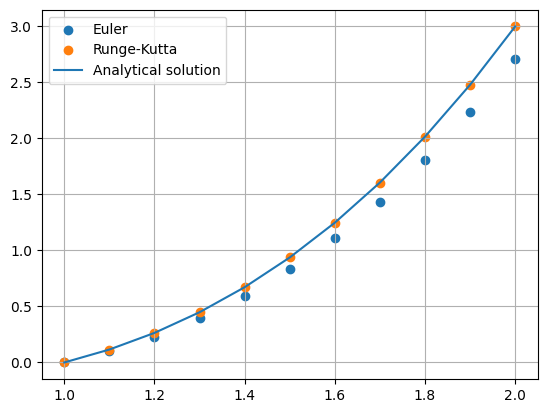

In [6]:
t, y = Euler(f, y_0, t_0, T, h=0.1)
# plt.plot(t, y)
# plt.plot(t, y, label=f"Euler")
plt.scatter(t, y[:, 0], label=f"Euler")

t, y = RungeKutta(f, y_0, t_0, T, h=0.1)
# plt.plot(t, y)
# plt.plot(t, y, label=f"Runge-Kutta")
plt.scatter(t, y[:, 0], label=f"Runge-Kutta")

y = Solution(t)
plt.plot(t, y, label="Analytical solution")

plt.grid()
plt.legend()
plt.show()

In [7]:
t, y_euler = Euler(f, y_0, t_0, T, h=0.1)
t, y_rk = RungeKutta(f, y_0, t_0, T, h=0.1)
y_analytical = Solution(t)

epsilon_euler = np.max(np.abs(y_analytical - y_euler[:, 0]))
epsilon_rk = np.max(np.abs(y_analytical - y_rk[:, 0]))

print(epsilon_euler, epsilon_rk)

0.2866245719364948 2.775590478343304e-06


**Задача №7.2.1** Задача Коши для ОДУ 2-го порядка 
$$
\begin{cases}
    m x'' + H x' + k x = f(t), \quad t \in [0; \, T], \\
    x(0) = x_0, \\
    x'(0) = v_0
\end{cases}
$$
описывает движение груза массы m, подвешенного к концу пружины. Здесь $ x(t) $ – смещение груза от положения равновесия, $ H $ – константа, характеризующая силу сопротивления среды, $ k $  – коэффициент упругости пружины, $ f(t) $ – внешняя сила. Начальные условия: $ x_0 $ – смещение груза в начальный момент времени $ t = 0 $, $ v_0 $ – скорость груза в начальный момент времени. Промоделировать движение груза на временном отрезке $ [0; \, T] $ при заданных в индивидуальном варианте трех наборах (I, II, III) значений параметров задачи. Для каждого набора по найденной таблице (или графику) решения задачи определить максимальное и минимальное значения функции $ x(t) $ и моменты времени, в которые эти значения достигаются. Предложить свой вариант задания параметров, при которых характер колебаний груза существенно отличается от рассмотренного ранее.

$$
\begin{cases}
    m x'' + H x' + k x = f(t), \quad t \in [0; \, T], \\
    x(0) = x_0, \\
    x'(0) = v_0
\end{cases} 
\iff 
\begin{cases}
    x_1' = x_2, \\
    x_2' = \cfrac{f(t) - H x_2 - k x_1}{m}, \\
    x_1(0) = x_0, \\
    x_2(0) = v_0
\end{cases} 
$$ 

1. $$ H = 0.5, \, k = 1, \, m = 1, \, f(t) = 0, \quad x_0 = 10, \, v_0 = 0, \, T = 20 $$

In [32]:
# I
H = 0.5
k = 1.0
m = 1000
x0 = 10
v0 = 0
t0 = 0
T = 20

In [33]:
def f(t):
    return 0.0

def g(t, x):
    return np.array([x[1], (f(t) - H * x[1] - k * x[0])]) / m

In [34]:
t, y = RungeKutta(g, y_0=np.array([x0, v0]), t_0=0, T=T, h=0.1)
x = y[:, 0]
v = y[:, 1]

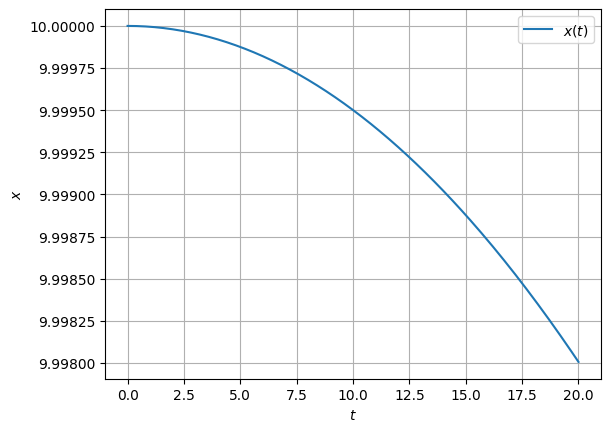

In [35]:
plt.plot(t, x, label="$ x(t) $")
# plt.plot(t, v, label="$ v(t) $")
plt.xlabel("$ t $")
plt.ylabel("$ x $")
plt.legend()
plt.grid()
plt.show()

2. $$ H = 0.5, \, k = 1, \, m = 1, \, f(t) = \sqrt{x}, \quad x_0 = 0, \, v_0 = 0, \, T = 20 $$

In [36]:
# II
H = 0.5
k = 1.0
m = 1.0
x0 = 0
v0 = 0
t0 = 0
T = 20

In [37]:
def f(t):
    return np.sqrt(t)

def g(t, x):
    return np.array([x[1], (f(t) - H * x[1] - k * x[0])]) / m

In [38]:
t, y = RungeKutta(g, y_0=np.array([x0, v0]), t_0=0, T=T, h=0.1)
x = y[:, 0]
v = y[:, 1]

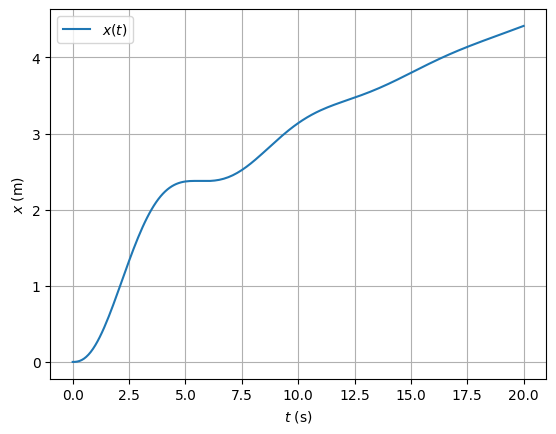

In [39]:
plt.plot(t, x, label="$ x(t) $")
# plt.plot(t, v, label="$ v(t) $")
plt.xlabel("$ t $ (s)")
plt.ylabel("$ x $ (m)")
plt.legend()
plt.grid()
plt.show()

In [40]:
# III
H = 0.5
k = 1.0
m = 1.0
x0 = -10
v0 = 0
t0 = 0
T = 20

In [41]:
def f(t):
    return np.sqrt(t)

def g(t, x):
    return np.array([x[1], (f(t) - H * x[1] - k * x[0])]) / m

In [42]:
t, y = RungeKutta(g, y_0=np.array([x0, v0]), t_0=0, T=T, h=0.1)
x = y[:, 0]
v = y[:, 1]

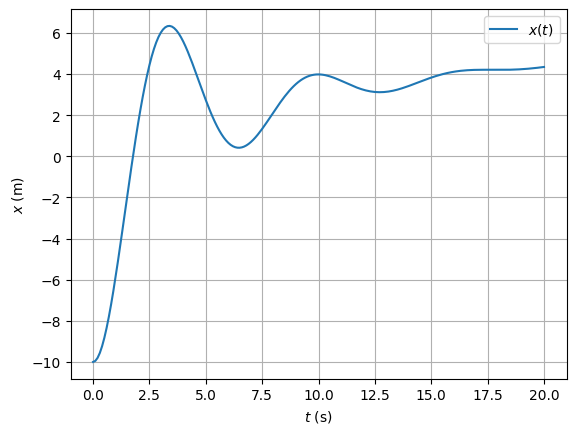

In [43]:
plt.plot(t, x, label="$ x(t) $")
# plt.plot(t, v, label="$ v(t) $")
plt.xlabel("$ t $ (s)")
plt.ylabel("$ x $ (m)")
plt.legend()
plt.grid()
plt.show()

**Задача №7.5.1** Дана жесткая задача Коши вида (1). Найти решение задачи с заданной точностью $ \varepsilon = 10^{-3} $.

$$ f(t, \, y) = -20 y + 2 t - 19.9, \quad t_0 = 0, \, T = 1.5, \, y_0 = 0 $$

In [44]:
t_0 = 0.0
T = 1.5
y_0 = 0.0
epsilon = 1e-3

In [45]:
def f(t, y):
    return -20 * y + 2 * t - 19.9

In [46]:
def solution(t):
    return -1 + 0.1 * t + np.exp(-20 * t)

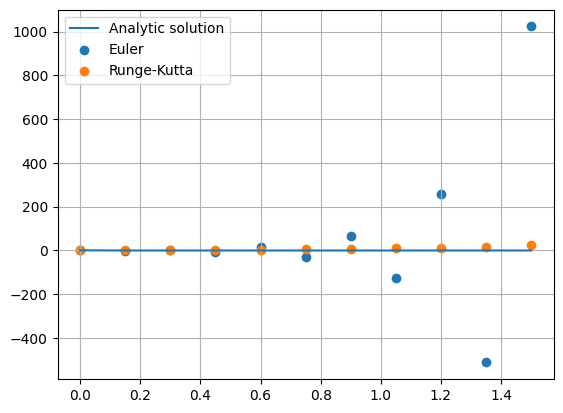

In [47]:
h = 0.15
t, y_euler = Euler(f=f, y_0=y_0, t_0=t_0, T=T, h=h)
t, y_rk = RungeKutta(f=f, y_0=y_0, t_0=t_0, T=T, h=h)
y_analytical = solution(t)

plt.plot(t, y_analytical, label="Analytic solution")
plt.scatter(t, y_euler[:, 0], label="Euler")
plt.scatter(t, y_rk[:, 0], label="Runge-Kutta")

plt.legend()
plt.grid()
plt.show()

In [48]:
epsilon_euler = np.max(np.abs(y_analytical - y_euler[:, 0]))
epsilon_rk = np.max(np.abs(y_analytical - y_rk[:, 0]))

print(epsilon_euler, epsilon_rk)

1023.9999999999995 24.15610905829801


0.000146484375


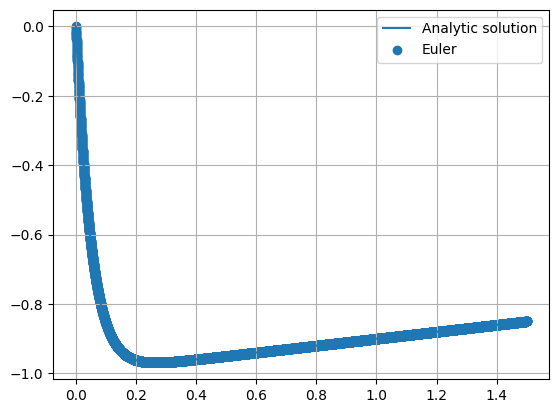

In [49]:
h = 0.15
while epsilon_euler > epsilon:
    h /= 2
    t, y_euler = Euler(f=f, y_0=y_0, t_0=t_0, T=T, h=h)
    y_analytical = solution(t)
    epsilon_euler = np.max(np.abs(y_analytical - y_euler[:, 0]))
print(h)

plt.plot(t, y_analytical, label="Analytic solution")
plt.scatter(t, y_euler[:, 0], label="Euler")

plt.legend()
plt.grid()
plt.show()

0.01875


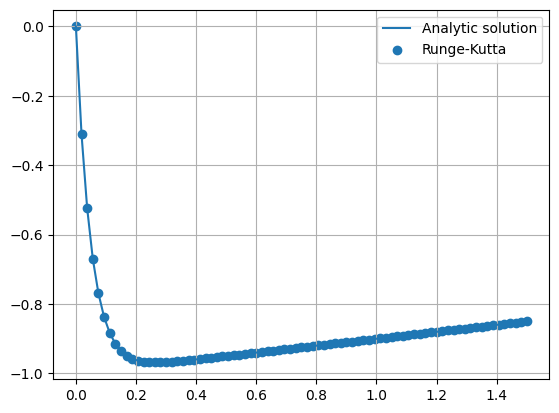

In [50]:
h = 0.15
while epsilon_rk > epsilon:
    h /= 2
    t, y_rk = RungeKutta(f=f, y_0=y_0, t_0=t_0, T=T, h=h)
    y_analytical = solution(t)
    epsilon_rk = np.max(np.abs(y_analytical - y_rk[:, 0]))

print(h)

plt.plot(t, y_analytical, label="Analytic solution")
plt.scatter(t, y_rk[:, 0], label="Runge-Kutta")

plt.legend()
plt.grid()
plt.show()
